In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [4]:
accre_jobs_2020 = pd.read_csv('../data/accre_jobs_2020_cleaned.csv')
display(accre_jobs_2020.head())

,jobid,account,user,reqtime,usedtime,nodes,cpus,partition,state,exitcode_user,exitcode_error,used_mb_per_core,reqmem_per_core,cluster_type,cluster_nodes
0,15925210,treviso,arabella,1188000,1188028,1,24,production,COMPLETED,0,0,2748.895417,5120.0,cn,1531
1,15861126,treviso,arabella,1188000,1090256,1,24,production,COMPLETED,0,0,2799.213333,5120.0,cn,1441
2,15861125,treviso,arabella,1188000,1188020,1,24,production,COMPLETED,0,0,2879.660833,5120.0,cn,1464
3,16251645,treviso,arabella,1188000,1050632,1,24,production,COMPLETED,0,0,2721.555417,5120.0,cn,1473
4,16251646,treviso,arabella,1188000,1188003,1,24,production,COMPLETED,0,0,2744.837917,5120.0,cn,1440


# Exploring the dataframe

In [5]:
accre_jobs_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813160 entries, 0 to 3813159
Data columns (total 15 columns):
jobid               object
account             object
user                object
reqtime             int64
usedtime            int64
nodes               int64
cpus                int64
partition           object
state               object
exitcode_user       int64
exitcode_error      int64
used_mb_per_core    float64
reqmem_per_core     float64
cluster_type        object
cluster_nodes       object
dtypes: float64(2), int64(6), object(7)
memory usage: 436.4+ MB


## column state

In [6]:
accre_jobs_2020['state'].value_counts()

COMPLETED              3804625
CANCELLED                 6106
FAILED                    1404
CANCELLED by 686562        681
OUT_OF_MEMORY               94
TIMEOUT                     80
CANCELLED by 505355         63
CANCELLED by 855431         17
CANCELLED by 782611         13
CANCELLED by 9206            9
CANCELLED by 397600          7
CANCELLED by 200557          6
CANCELLED by 0               5
CANCELLED by 486541          4
CANCELLED by 454080          4
CANCELLED by 199766          4
CANCELLED by 9201            3
CANCELLED by 9202            3
CANCELLED by 483348          3
CANCELLED by 649319          3
CANCELLED by 693461          2
CANCELLED by 90423           2
CANCELLED by 791651          2
CANCELLED by 666860          2
CANCELLED by 895426          2
CANCELLED by 546080          2
CANCELLED by 124006          2
CANCELLED by 199066          2
CANCELLED by 515423          2
CANCELLED by 651701          1
CANCELLED by 763605          1
CANCELLED by 337422          1
CANCELLE

In [7]:
### trying to add cancelled by ... to canceled jobs
#re.sub(r"CANCELLED by\s\d+", 'CANCELLED', accre_jobs_2020.state) need to do a lambda function and .apply
#accre_jobs_2020[accre_jobs_2020["account"].str.match('\d+')].value_counts()

In [8]:
#accre_jobs_2020[(accre_jobs_2020_clean2['state'] == 'FAILED')].nodelist.value_counts()

In [9]:
#plt.figure(figsize = (20,500))
#accre_jobs_2020[(accre_jobs_2020['state'] == 'FAILED')].groupby('state')['nodelist'].value_counts().plot(kind = 'barh')
#plt.yticks(fontsize = 20);

## column partition

In [10]:
accre_jobs_2020['partition'].value_counts()

production              3308915
nogpfs                   327432
sam                       79151
pascal                    48000
turing                    39377
debug                      6738
maxwell                    3347
cgw-capra1                   83
cgw-dougherty1               70
cgw-cqs1                     34
cgw-cqs3                      4
cgw-vm-qa-flatearth1          4
devel                         2
cgw-tbi01                     2
cgw-rocksteady                1
Name: partition, dtype: int64

## Exit code error

In [ ]:
#accre_jobs_2020(accre_jobs_2020['exitcode_error'] != 0)

In [24]:
accre_jobs_2020['account'].value_counts()

cms              806448
cep              609282
summer           380840
galia            198036
carrot           192551
orange           158400
cms_lowprio      135682
casaba           117703
portabella       109680
bunch            105877
cmsadmin         102589
bulk              78608
boysenberries     57620
sharlin           57397
horseradish       53707
grisette          42447
sweet             40241
mixed             39311
retailer          39091
key               37711
round             36827
wood              32383
savoy             30482
sprite            25892
atemoyas          25020
winged            24770
garlic            19969
wax               19623
celery            17399
alkmene           15605
                  ...  
pickling             11
maltaise             11
galangal             10
oroblanco             9
pioppino              7
polk                  7
nino                  6
cocktail              6
ingrid                6
stalk                 4
pink            

In [27]:
accre_jobs_2020.groupby('account')['user'].value_counts()

account   user     
alkmene   velvet       15269
          vaughn         163
          marci          138
          abigail         23
          cleve           12
almonds   montie        1891
amaranth  alvira        3033
angelys   namon          899
          macey            9
          katrina          4
          christian        3
          auther           2
          lethia           1
anise     ginger        1180
          kori           225
          osbaldo        182
          adelina        116
          sigrid          48
          alvera          17
          hattie           3
          hailey           1
antares   hubbard        160
arra      needham         65
atemoyas  pamelia      25018
          loda             2
baby      kegan         3186
baking    suzie          137
          christa        116
          gerhardt        98
          gladstone       74
                       ...  
water     mareli          46
wax       porfirio     19623
white     pearla       

# Questions:

### Question 1: 
While we have systematic checks in place to ensure the general system health of each compute node, we would like to use long-term data to see if there are any clusters of job failures on specific nodes. Do any of the production partition nodes show an unusual number of failed jobs relative to the others? Ignore the debug partition for this question.
We are concerned with potentially unreliable nodes which are not being detected by our routine monitoring. Of the failed jobs, do any nodes show up unusually often? 

•	Look for failed jobs

In [11]:
accre_jobs_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813160 entries, 0 to 3813159
Data columns (total 15 columns):
jobid               object
account             object
user                object
reqtime             int64
usedtime            int64
nodes               int64
cpus                int64
partition           object
state               object
exitcode_user       int64
exitcode_error      int64
used_mb_per_core    float64
reqmem_per_core     float64
cluster_type        object
cluster_nodes       object
dtypes: float64(2), int64(6), object(7)
memory usage: 436.4+ MB


In [13]:
accre_jobs_2020_failed = accre_jobs_2020.loc[(accre_jobs_2020['state'] == 'FAILED')]

In [14]:
accre_jobs_2020_failed.shape

(1404, 15)

In [16]:
accre_jobs_2020_failed['partition'].value_counts()

pascal        702
production    500
maxwell       102
nogpfs         53
debug          27
turing         20
Name: partition, dtype: int64

In [17]:
accre_jobs_2020_failed['cluster_type'].value_counts()

gpu        825
cn         573
ng           4
generic      2
Name: cluster_type, dtype: int64

In [18]:
accre_jobs_2020_failed[(accre_jobs_2020_failed["partition"] == "production")].cluster_type.value_counts()

cn    500
Name: cluster_type, dtype: int64

In [133]:
accre_jobs_2020_failed[(accre_jobs_2020_failed["partition"] == "pascal")].cluster_type.value_counts()

gpu    702
Name: cluster_type, dtype: int64

In [21]:
accre_jobs_2020_failed_prod.cluster_nodes.__len__()

500

In [115]:
accre_jobs_2020_failed_prod.head()

,jobid,account,user,reqtime,usedtime,nodes,cpus,partition,state,exitcode_user,exitcode_error,used_mb_per_core,reqmem_per_core,cluster_type,cluster_nodes
104025,17234446,crowns,tena,129600,129612,51,1,production,FAILED,1,0,171.330980,5120.0,cn,"336,337,338,340,347,348,374,375,376,377,378,37..."
124391,17261993,burro,golda,1800,1,1,1,production,FAILED,13,0,0.000000,1024.0,cn,394
167784,17329248,pearl,auther,1800,0,2,8,production,FAILED,2,0,0.000000,1024.0,cn,"326,499"
199497,17354412,crowns,tena,108000,6542,75,1,production,FAILED,1,0,57.033867,5120.0,cn,"331,332,333,334,335,336,337,338,340,347,348,34..."
226414,17390284,bulk,lela,72000,61,10,1,production,FAILED,1,0,402.841000,2048.0,cn,"1263,1275,1303,1309,1335,1336,1351,1372,1376,1424"


In [ ]:
#accre_jobs_2020[(accre_jobs_2020['state'] == 'FAILED') & (accre_jobs_2020["partition"] == "turing")].nodelist.value_counts()

In [ ]:
#accre_jobs_2020_failed[(accre_jobs_2020_failed["partition"] == "production") & (accre_jobs_2020_failed["cluster_type"] == "cn")].cluster_nodes.value_counts()

In [19]:
accre_jobs_2020_failed_prod = accre_jobs_2020_failed.loc[accre_jobs_2020_failed["partition"] == "production"]

In [ ]:
#accre_jobs_2020_failed2 = accre_jobs_2020_failed.groupby['cluster_type']('cluster_nodes')

In [ ]:
#pd.set_option('display.max_rows', None)
#accre_jobs_2020_failed_prod.cluster_nodes.value_counts()

In [20]:
accre_jobs_2020_failed_prod['cluster_nodes'].value_counts().to_frame()

,cluster_nodes
1273,9
1458,6
1364,6
304,6
1450,5
1270,5
1479,5
"1530,1531",5
"1468,1469",4
1267,4


In [99]:
def most_common_failed_nodes (df, column, n):
    value = df[column].value_counts().to_frame().nlargest(n, column)
    return value

In [100]:
most_common_failed_nodes(accre_jobs_2020_failed_prod, 'cluster_nodes', 20)

,cluster_nodes
1273,9
1458,6
1364,6
304,6
1450,5
1270,5
1479,5
"1530,1531",5
"1468,1469",4
1267,4


In [237]:
def nodes_barchart (df, column, n, palet=None, x=12, y=6):
    most_common_failed_nodes(df, column, n).plot(kind='bar', legend=None, color = palet, figsize = (x,y))
    plt.title("Top {} failed nodes and clusters".format(n, column), fontsize = 16, fontweight = 'bold')
    plt.xticks(fontsize = 14)
    plt.xlabel('cn', fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylabel('count', fontsize = 14)
    plt.show();
    

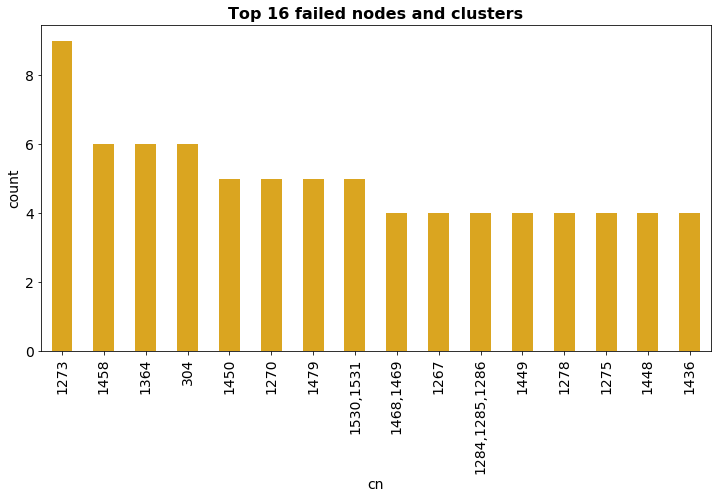

In [271]:
nodes_barchart(accre_jobs_2020_failed_prod,'cluster_nodes', 16, 'goldenrod')

In [222]:
def most_common_failed_nodes_norm (df, column, n):
    value = (df[column].value_counts(normalize = True)*100).to_frame().nlargest(n, column)
    return value

In [223]:
most_common_failed_nodes_norm(accre_jobs_2020_failed_prod, 'cluster_nodes', 20)

,cluster_nodes
1273,1.8
1458,1.2
1364,1.2
304,1.2
1450,1.0
1270,1.0
1479,1.0
"1530,1531",1.0
"1468,1469",0.8
1267,0.8


In [232]:
def nodes_barchart_norm (df, column, n, palet=None, x=12, y=6):
    most_common_failed_nodes_norm(df, column, n).plot(kind='bar', legend=None, color = palet, figsize = (x,y))
    plt.title("Top {} failed nodes and clusters".format(n, column), fontsize = 16, fontweight = 'bold')
    plt.xticks(fontsize = 14)
    plt.xlabel('cn', fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylabel('percentage', fontsize = 14)
    plt.show();

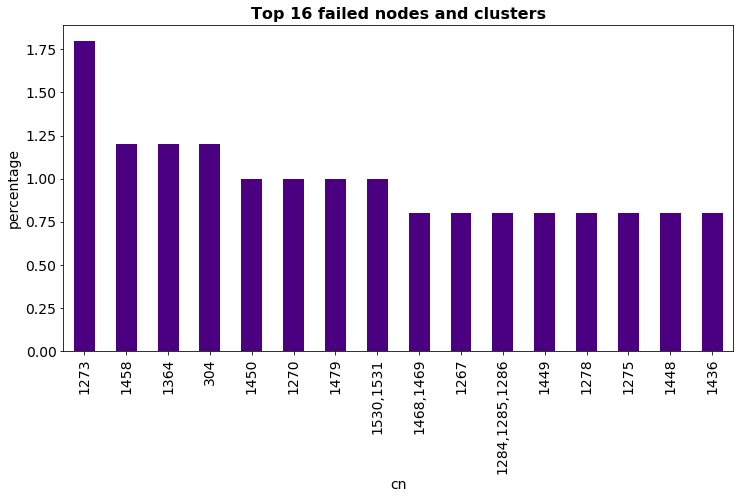

In [270]:
nodes_barchart_norm(accre_jobs_2020_failed_prod,'cluster_nodes', 16, 'indigo')

## Now I want to get the occurence of the single nodes with failed jobs and if they are found in the cluster nodes.

### Node # with failed jobs possible outcomes:
 
1 => node #1 is defective
 
2 => node #2 is defective
 
1, 2 => node is defective because 1 and 2 individually are defective
 
1, 3 => node is defective because 1 individually is defective but I can’t say anything about node 3 unless it’s used alone and there is a completed job
 
2, 4, 5, 6 => node is defective because 2 individually is defective can’t say anything about the other nodes
 
5, 7, 8 => node is defective but not a single one was found to be defective individually… however 5 was found in another node cluster that fail
 
9, 10, 12 => node is defective but not a single one was found to be defective individually… and they were not found in a cluster with known failed job

### What I can do: look only to the single nodes and see if they are used in the cluster
 
1 => node #1 is defective
 
2 => node #2 is defective
 
1, 2 => node is defective because 1 and 2 individually are defective
 
1, 3 => node is defective because 1 individually is defective
 
Value count here is 1: 3 and 2: 2


### 1/ Make cluster_nodes as a list

In [272]:
single_ones = (accre_jobs_2020_failed_prod["cluster_nodes"]).tolist()

In [273]:
single_ones

['336,337,338,340,347,348,374,375,376,377,378,379,380,386,387,388,389,390,391,392,393,394,395,396,401,403,404,405,407,408,409,410,411,487,488,489,490,491,492,493,494,495,496,497,498,499,500,911,912,913,1081',
 '394',
 '326,499',
 '331,332,333,334,335,336,337,338,340,347,348,349,361,362,363,364,365,366,367,386,387,388,389,390,391,392,393,395,396,398,399,400,401,403,404,405,407,408,409,410,411,412,413,414,441,442,443,444,445,446,447,448,464,465,466,467,468,469,470,471,472,473,1273,1274,1275,1276,1277,1278,1279,1340,1341,1342,1343,1344,1345',
 '1263,1275,1303,1309,1335,1336,1351,1372,1376,1424',
 '1263,1275,1287,1303,1309,1335,1336,1351,1372,1376',
 '1263,1275,1287,1303,1309,1335,1336,1351,1372,1373',
 '1263,1275,1287,1303,1309,1335,1336,1348,1372,1373',
 '1274,1275,1276,1277,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1420,1421,1422,1423,1424,1425,1426,1427',
 '1442,1444',
 '1301,1382',
 

## 2/ Make a for loop to get a list of single nodes (keep the occurence as well):

In [274]:
single_nodes =[]
for nodes in accre_jobs_2020_failed_prod["cluster_nodes"]:
    nodes_list = nodes.split(',') #123, 456 --> 123 456
    if len(nodes_list) == 1:
        single_nodes.append(nodes) 
    
    

In [275]:
single_nodes

['394',
 '469',
 '1446',
 '1446',
 '1431',
 '1212',
 '1273',
 '1471',
 '1301',
 '1090',
 '912',
 '1121',
 '304',
 '425',
 '304',
 '1400',
 '382',
 '382',
 '430',
 '430',
 '1462',
 '304',
 '304',
 '304',
 '309',
 '1366',
 '1526',
 '1526',
 '1458',
 '1486',
 '1435',
 '1267',
 '1387',
 '1387',
 '1387',
 '1201',
 '1226',
 '1436',
 '1440',
 '1447',
 '1448',
 '1449',
 '1450',
 '1288',
 '1322',
 '1448',
 '1450',
 '1468',
 '1473',
 '1479',
 '1516',
 '1479',
 '1516',
 '1458',
 '1479',
 '1458',
 '1479',
 '1458',
 '1479',
 '449',
 '1206',
 '304',
 '1441',
 '1445',
 '1443',
 '1462',
 '1464',
 '1469',
 '1439',
 '1438',
 '1453',
 '1454',
 '1430',
 '1448',
 '1449',
 '1450',
 '1495',
 '1527',
 '1497',
 '1499',
 '1484',
 '1520',
 '1521',
 '1515',
 '1441',
 '1445',
 '1443',
 '1462',
 '1469',
 '1438',
 '1453',
 '1454',
 '1448',
 '1449',
 '1450',
 '1491',
 '1519',
 '1232',
 '1236',
 '1202',
 '1216',
 '1217',
 '1310',
 '1392',
 '1359',
 '1235',
 '1275',
 '1275',
 '1275',
 '1259',
 '1375',
 '1089',
 '1450',

In [276]:
len(single_nodes)

255

In [279]:
from pandas import Series
series_single_nodes = Series(single_nodes)

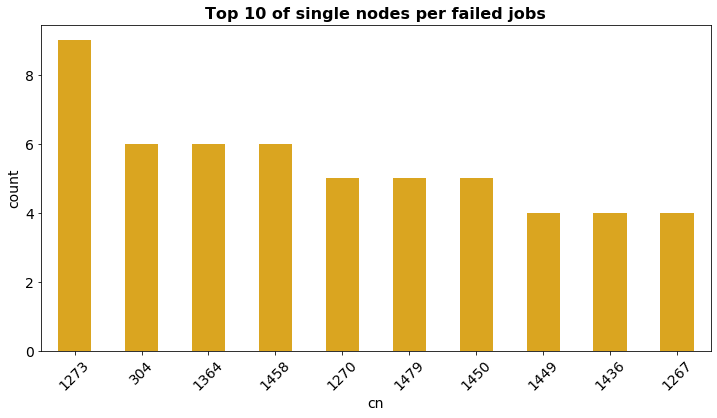

In [282]:
plt.figure(figsize = (12,6))
series_single_nodes[1:].value_counts().nlargest(10).plot(kind = 'bar', color = 'goldenrod')
plt.title('Top 10 of single nodes per failed jobs', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 14)
plt.xlabel('cn', fontsize = 14)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 14)
plt.ylabel('count', fontsize = 14);

## 3/ Make a list of the clusters only:

In [144]:
cluster_nodes = []
for nodes in accre_jobs_2020_failed_prod["cluster_nodes"]:
    nodes_list = nodes.split(',')#123, 456 --> 123 456
    if len(nodes_list) > 1:
        cluster_nodes.append(nodes_list)

In [145]:
cluster_nodes

[['336',
  '337',
  '338',
  '340',
  '347',
  '348',
  '374',
  '375',
  '376',
  '377',
  '378',
  '379',
  '380',
  '386',
  '387',
  '388',
  '389',
  '390',
  '391',
  '392',
  '393',
  '394',
  '395',
  '396',
  '401',
  '403',
  '404',
  '405',
  '407',
  '408',
  '409',
  '410',
  '411',
  '487',
  '488',
  '489',
  '490',
  '491',
  '492',
  '493',
  '494',
  '495',
  '496',
  '497',
  '498',
  '499',
  '500',
  '911',
  '912',
  '913',
  '1081'],
 ['326', '499'],
 ['331',
  '332',
  '333',
  '334',
  '335',
  '336',
  '337',
  '338',
  '340',
  '347',
  '348',
  '349',
  '361',
  '362',
  '363',
  '364',
  '365',
  '366',
  '367',
  '386',
  '387',
  '388',
  '389',
  '390',
  '391',
  '392',
  '393',
  '395',
  '396',
  '398',
  '399',
  '400',
  '401',
  '403',
  '404',
  '405',
  '407',
  '408',
  '409',
  '410',
  '411',
  '412',
  '413',
  '414',
  '441',
  '442',
  '443',
  '444',
  '445',
  '446',
  '447',
  '448',
  '464',
  '465',
  '466',
  '467',
  '468',
  '469',


In [256]:
len(cluster_nodes)

245

In [259]:
from pandas import Series
series_cluster_nodes = Series(cluster_nodes)

In [260]:
series_cluster_nodes[1:].value_counts()

[1530, 1531]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 5
[1284, 1285, 1286]                                                                                                                                                                                                                                                                                                                                                                                                                       

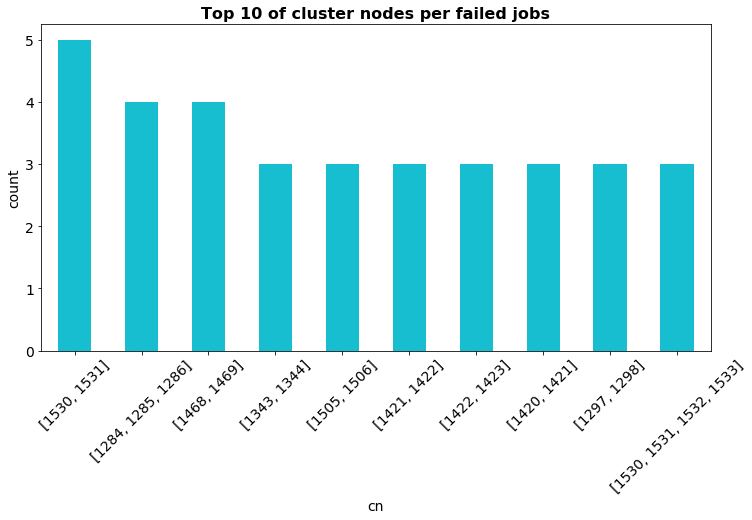

In [277]:
plt.figure(figsize = (12,6))
series_cluster_nodes[1:].value_counts().nlargest(10).plot(kind = 'bar', color = 'tab:cyan')
plt.title('Top 10 of cluster nodes per failed jobs', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 14)
plt.xlabel('cn', fontsize = 14)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 14)
plt.ylabel('count', fontsize = 14);

## 4/ Get a list of single nodes and if they are found in the clusters (You most likely will get more than one):

In [287]:
total_nodes = []
for x in single_one: ### look at nodes in the single nodes list 
    for list_y in cluster_nodes: ### look at nodes in the cluster nodes list
        if x in list_y: ### if single node is found in the cluster list
            total_nodes.append(x) ### add this node to the total_nodes list   

In [288]:
total_nodes

['394',
 '394',
 '394',
 '394',
 '394',
 '394',
 '469',
 '469',
 '469',
 '469',
 '469',
 '469',
 '469',
 '469',
 '469',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1446',
 '1431',
 '1431',
 '1431',
 '1212',
 '1212',
 '1212',
 '1212',
 '1212',
 '1212',
 '1212',
 '1212',
 '1212',
 '1212',
 '1212',
 '1212',
 '1273',
 '1273',
 '1273',
 '1273',
 '1273',
 '1273',
 '1471',
 '1471',
 '1471',
 '1471',
 '1471',
 '1471',
 '1471',
 '1471',
 '1471',
 '1471',
 '1471',
 '1471',
 '1471',
 '1301',
 '1301',
 '1301',
 '1301',
 '1301',
 '1301',
 '1301',
 '1090',
 '1090',
 '1090',
 '1090',
 '1090',
 '1090',
 '1090',
 '1090',
 '1090',
 '1090',
 '912',
 '912',
 '912',
 '912',
 '912',
 '912',
 '912',
 '1121',
 '1121',
 '1121',
 '1121',
 '1121',
 '1121',
 '1121',
 '304',
 '304',
 '425',
 '425',
 '304',
 '304',
 '382',
 '382',
 '382',
 '382',
 '382',
 '382',
 '430',
 '430',
 '430',
 '430',
 '1462',
 '1

## 5/ I now have a list but I need to make it as a series if I want to get a value_counts since right now the values are string and not int: (nb. could I just have convert it as int?)

In [289]:
type(total_nodes)

list

In [290]:
len(total_nodes)

2069

In [291]:
from collections import Counter
Counter(total_nodes)

Counter({'394': 12,
         '469': 9,
         '1446': 18,
         '1431': 3,
         '1212': 12,
         '1273': 54,
         '1471': 13,
         '1301': 7,
         '1090': 20,
         '912': 7,
         '1121': 7,
         '304': 12,
         '425': 2,
         '382': 9,
         '430': 4,
         '1462': 30,
         '309': 6,
         '1366': 3,
         '1526': 2,
         '1458': 60,
         '1486': 1,
         '1435': 9,
         '1267': 48,
         '1387': 12,
         '1201': 10,
         '1226': 12,
         '1436': 48,
         '1440': 20,
         '1447': 3,
         '1448': 28,
         '1449': 32,
         '1450': 30,
         '1288': 3,
         '1322': 3,
         '1468': 18,
         '1473': 22,
         '1479': 60,
         '1516': 12,
         '449': 6,
         '1206': 10,
         '1441': 18,
         '1445': 24,
         '1443': 12,
         '1464': 22,
         '1469': 51,
         '1439': 33,
         '1438': 16,
         '1453': 6,
         '1454': 20

In [292]:
### I need it to make a series 
from pandas import Series
series_nodes = Series(total_nodes)
series_nodes

0        394
1        394
2        394
3        394
4        394
5        394
6        469
7        469
8        469
9        469
10       469
11       469
12       469
13       469
14       469
15      1446
16      1446
17      1446
18      1446
19      1446
20      1446
21      1446
22      1446
23      1446
24      1446
25      1446
26      1446
27      1446
28      1446
29      1446
        ... 
2039    1445
2040    1445
2041    1271
2042    1271
2043    1271
2044    1271
2045    1271
2046    1271
2047    1271
2048    1271
2049    1433
2050    1433
2051    1433
2052    1433
2053    1433
2054    1433
2055    1433
2056    1433
2057    1433
2058    1433
2059    1433
2060    1433
2061    1433
2062    1433
2063    1433
2064    1433
2065    1433
2066    1433
2067    1433
2068    1433
Length: 2069, dtype: object

In [293]:
series_nodes.to_frame()

,0
0,394
1,394
2,394
3,394
4,394
5,394
6,469
7,469
8,469
9,469


In [294]:
# I want a value count of the nodes, if I don't specify I get the index as well
series_nodes[1:].value_counts()

1458    60
1479    60
1275    56
1273    54
1469    51
1270    50
1267    48
1436    48
1313    48
1278    44
1391    34
1439    33
1449    32
1306    30
1450    30
1462    30
1351    30
1433    30
1364    30
1448    28
1239    26
1424    25
1269    24
1235    24
1261    24
1445    24
1473    22
1464    22
1532    21
1090    20
        ..
1521     6
1523     6
309      6
1518     5
1259     5
1328     5
1357     4
913      4
1132     4
430      4
1482     4
1082     3
1431     3
1283     3
1519     3
1288     3
1366     3
1447     3
1536     3
1084     3
1322     3
1329     2
1487     2
1262     2
1526     2
425      2
1379     1
1484     1
1486     1
1527     1
Length: 135, dtype: int64

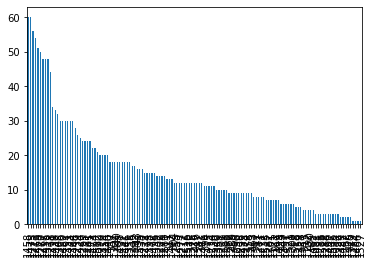

In [295]:
series_nodes[1:].value_counts().plot(kind='bar');

In [296]:
number_nodes_occurence = series_nodes[1:].value_counts()

In [297]:
len(number_nodes_occurence)

135

There is 135 nodes that are used as single nodes that resulted as a failed job.

## 6/ Make a graph to illustrate the findings

### A/ By count:

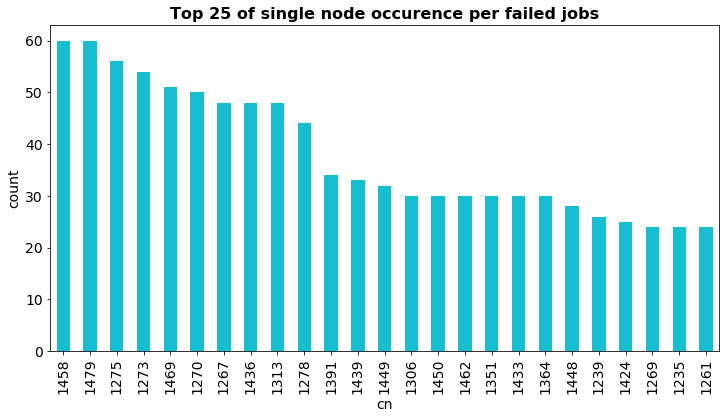

In [298]:
plt.figure(figsize = (12,6))
number_nodes_occurence.nlargest(25).plot(kind = 'bar', color = 'tab:cyan')
plt.title('Top 25 of single node occurence per failed jobs', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 14)
plt.xlabel('cn', fontsize = 14);
plt.yticks(fontsize = 14)
plt.ylabel('count', fontsize = 14);

### B/ By percentage:

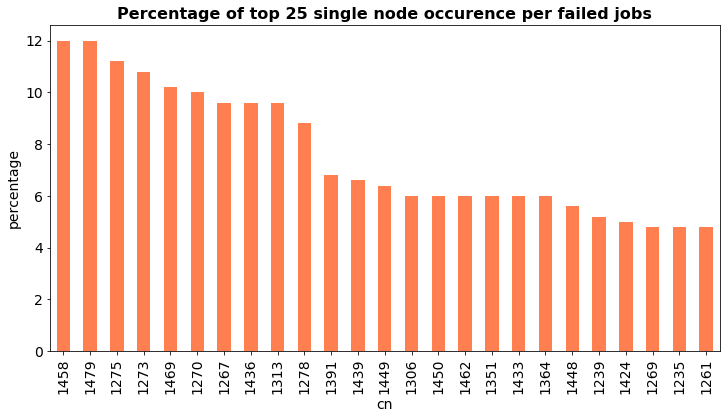

In [299]:
plt.figure(figsize = (12,6))
((number_nodes_occurence.nlargest(25)/500)*100).plot(kind = 'bar', color = 'coral')
plt.title('Percentage of top 25 single node occurence per failed jobs', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 14)
plt.xlabel('cn', fontsize = 14);
plt.yticks(fontsize = 14)
plt.ylabel('percentage', fontsize = 14);

## 7/ checking if second analysis of single nodes is useful:

In [243]:
(series_nodes =="1468").value_counts()

False    2051
True       18
dtype: int64

In [244]:
(series_nodes =="1530").value_counts()

False    2058
True       11
dtype: int64

In [245]:
(series_nodes =="1531").value_counts()

False    2069
dtype: int64

Now that is interesting! The cluster 1530 and 1531 was found 5 times in the first analysis and was the biggest failed cluster. When I look at the number of occurences of 1530, I find it 11 times so it was used as a cluster but also alone and it failed. However 1531 was never found, so it was never used as a single node and I can't say this node is defective.

## I will need to look if those cluster nodes in the failed partition did work in completed jobs

In [304]:
#accre_jobs_2020.iloc[accre_jobs_2020["cluster_nodes" == "1531"]]

## 8/ Diving into the data:

In [251]:
accre_jobs_2020_failed_prod['exitcode_error'].value_counts()

0    500
Name: exitcode_error, dtype: int64

In [286]:
accre_jobs_2020_failed_prod['exitcode_user'].value_counts().to_frame()

,exitcode_user
1,327
2,60
127,39
7,31
6,11
13,10
24,7
11,6
116,4
99,2


In [253]:
accre_jobs_2020_failed_prod['account'].value_counts()

cep            127
plantain        88
tips            65
bertanne        27
carrot          27
pasilla         27
crowns          20
crab            13
wood            12
seeded          11
mignonette      10
angelys          9
poblano          9
peanuts          9
cms              8
alkmene          7
concord          4
lemon            4
horseradish      4
bulk             4
forelle          3
anise            2
sunburst         1
grisette         1
cms_lowprio      1
orange           1
pearl            1
clara            1
retailer         1
sharlin          1
burro            1
mixed            1
Name: account, dtype: int64

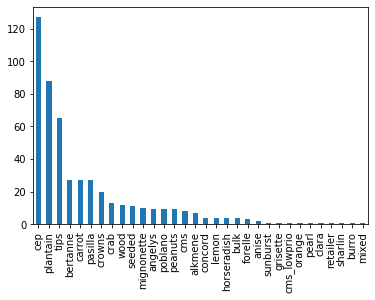

In [254]:
accre_jobs_2020_failed_prod['account'].value_counts().plot(kind='bar');

In [283]:
accre_jobs_2020_failed_prod.head()

,jobid,account,user,reqtime,usedtime,nodes,cpus,partition,state,exitcode_user,exitcode_error,used_mb_per_core,reqmem_per_core,cluster_type,cluster_nodes
104025,17234446,crowns,tena,129600,129612,51,1,production,FAILED,1,0,171.330980,5120.0,cn,"336,337,338,340,347,348,374,375,376,377,378,37..."
124391,17261993,burro,golda,1800,1,1,1,production,FAILED,13,0,0.000000,1024.0,cn,394
167784,17329248,pearl,auther,1800,0,2,8,production,FAILED,2,0,0.000000,1024.0,cn,"326,499"
199497,17354412,crowns,tena,108000,6542,75,1,production,FAILED,1,0,57.033867,5120.0,cn,"331,332,333,334,335,336,337,338,340,347,348,34..."
226414,17390284,bulk,lela,72000,61,10,1,production,FAILED,1,0,402.841000,2048.0,cn,"1263,1275,1303,1309,1335,1336,1351,1372,1376,1424"


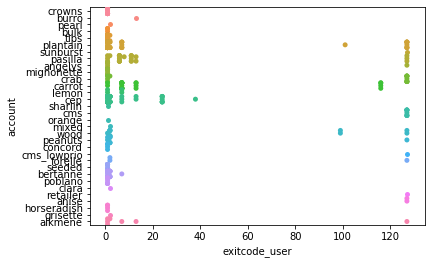

In [285]:
sns.swarmplot(x='exitcode_user', y='account', data=accre_jobs_2020_failed_prod);

(from taylor)
failures_by_nodelist = accre_df_failures['NODELIST'].value_counts().rename_axis('NODELIST').reset_index(name='FAILURES)

def node_list_count (cluster_nodes, x):
    """This function is to count the number of occurence of single nodes in cluster nodes."""
    single_nodes =[]
    nodes_list = nodes.split(',') #123, 456 --> 123 456
    for nodes in accre_jobs_2020_failed_prod["cluster_nodes"]:
        #nodes_list = nodes.split(',') #123, 456 --> 123 456
        if len(nodes_list) == 1:
        single_nodes.append(nodes) 
        
    cluster_nodes = []
    for nodes in accre_jobs_2020_failed_prod["cluster_nodes"]:
        #nodes_list = nodes.split(',') #123, 456 --> 123 456
        if len(nodes_list) > 1:
            cluster_nodes.append(nodes_list) 
            
    total_nodes = []
    for x in single_nodes:
        for list_y in cluster_nodes:
            if x in list_y:
                total_nodes.append(x)

## Question 2:

The CMS collaboration has an automated job submission system that runs jobs as "cmslocal" and "cmspilot". For these two users, jobs have internal system tests that will terminate their jobs early after approximately 30 minutes. Do any of their jobs that ended in under an hour also cluster on specific compute nodes, suggesting possibly unreliable systems? Check both “production” and “nogpfs” partitions. Look for commonly failing nodes and compare with other failed jobs.

In [112]:
accre_jobs_2020_failed.head()

,jobid,account,user,reqtime,usedtime,nodes,cpus,partition,state,exitcode_user,exitcode_error,used_mb_per_core,reqmem_per_core,cluster_type,cluster_nodes
22228,17072678,cms,cmspilot,172800,155,1,8,nogpfs,FAILED,126,0,1413.840,2734.375,ng,909
56710,17150413,blueberries,leva,36000,8154,1,1,pascal,FAILED,1,0,1968.020,4096.000,gpu,0021
68655,17178412,cubanelle,robyn,900,857,1,1,pascal,FAILED,2,0,73.320,1024.000,gpu,0021
79627,17198446,turban,codie,432000,112,1,2,pascal,FAILED,1,0,333.305,12288.000,gpu,0020
87757,17202272,blueberries,leva,36000,4400,1,1,pascal,FAILED,1,0,1946.370,4096.000,gpu,0019


In [116]:
accre_jobs_2020_failed_term1h = accre_jobs_2020_failed.loc[(accre_jobs_2020_failed['usedtime'] <= 3600)]

In [118]:
accre_jobs_2020_failed_term1h.head()

,jobid,account,user,reqtime,usedtime,nodes,cpus,partition,state,exitcode_user,exitcode_error,used_mb_per_core,reqmem_per_core,cluster_type,cluster_nodes
22228,17072678,cms,cmspilot,172800,155,1,8,nogpfs,FAILED,126,0,1413.840,2734.375,ng,909
68655,17178412,cubanelle,robyn,900,857,1,1,pascal,FAILED,2,0,73.320,1024.000,gpu,0021
79627,17198446,turban,codie,432000,112,1,2,pascal,FAILED,1,0,333.305,12288.000,gpu,0020
96501,17217459,turban,codie,432000,131,1,2,pascal,FAILED,1,0,340.955,12288.000,gpu,0024
96502,17217464,turban,codie,432000,231,1,2,pascal,FAILED,1,0,335.030,12288.000,gpu,0025


In [121]:
accre_jobs_2020_failed_term1h_nogpfs = accre_jobs_2020_failed_term1h.loc[(accre_jobs_2020_failed_term1h['partition'] == "nogpfs")]

In [ ]:
accre_jobs_2020_failed_term1h_nogpfs

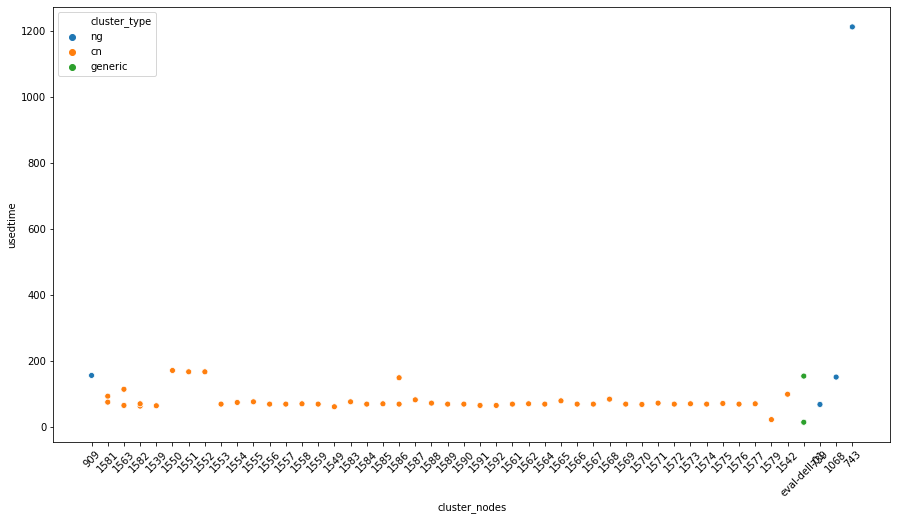

In [129]:
fig, ax = plt.subplots(figsize = (15,8))
sns.scatterplot(data =accre_jobs_2020_failed_term1h_nogpfs, x="cluster_nodes", y="usedtime", hue = "cluster_type" )
plt.xticks(rotation = 45);

In [119]:
accre_jobs_2020_failed_term1h_prod = accre_jobs_2020_failed_term1h.loc[(accre_jobs_2020_failed_term1h['partition'] == "production")]

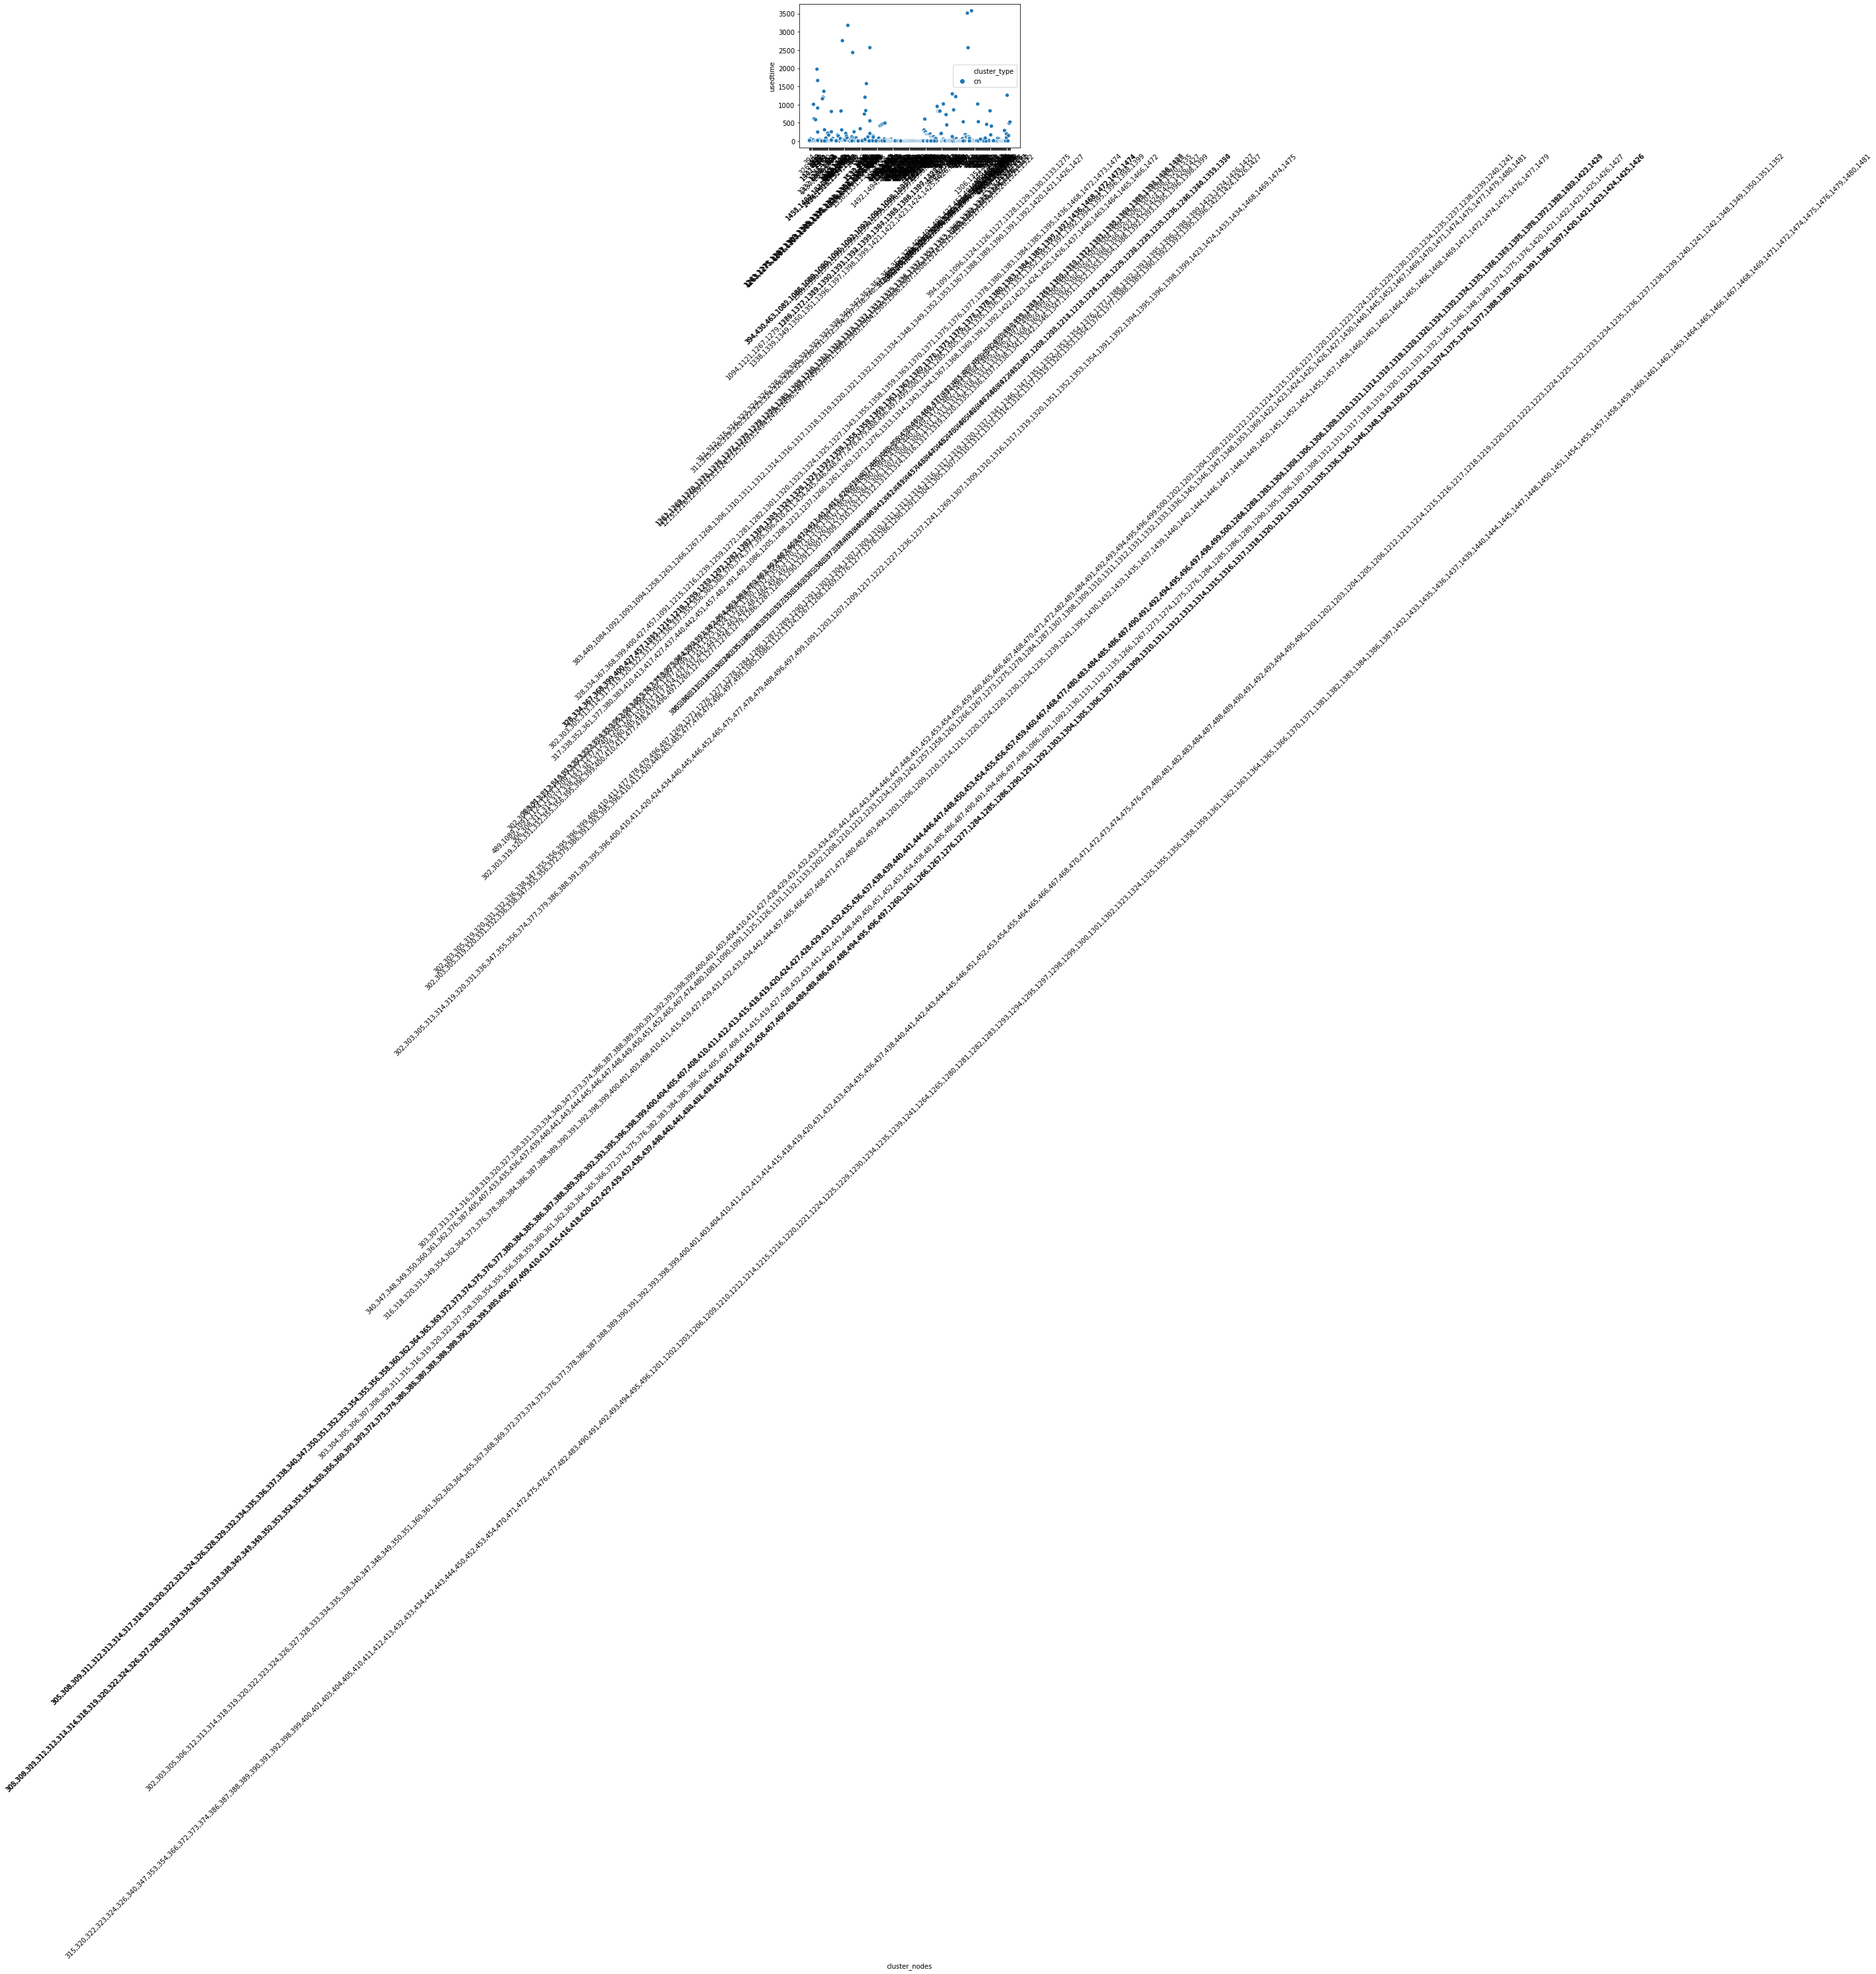

In [132]:
sns.scatterplot(data = accre_jobs_2020_failed_term1h_prod, x="cluster_nodes", y="usedtime", hue = "cluster_type" )
plt.xticks(rotation = 45);